### Exercício prático 05 - Interpolação

### Implementar dois algoritmos de interpolação, sendo um deles pela forma de Newton

#### 1 - Forma de Lagrange

In [74]:
import numpy as np
import matplotlib.pyplot as plt


def interpLagrange(xp,x,y):
  yp = 0
  n =len(x)-1
  for k in range(0,n+1):
    p = 1
    for j in range(0,n+1):
      if k != j:
        p = p*(xp - x[j])/(x[k] - x[j])

    yp = yp + p * y[k]

  return yp


def interpLagrangeGrafico(x,y):
  """Função que encontra o polinômio Interpolador pela forma de Lagrange.\n
  Parâmetros:\n
  x = vetor com valores x pra formação do polinômio Interpolador\n
  y = vetor com os valores de y pra formação da cunção interpoladora\n
  Intervalo = intervalo que será gerada a função Interpoladora. Por padrão recebe o valor de -1 até 2

  A função gera o gráfico da função interpoladora e retorna os valores da função interpoladora nesse intervalo passado por parâmetro
  """
  Intervalo=np.arange(min(x),max(x)+0.0001,0.01)

  n =len(x) - 1
  yt = []
  # Valor inicial de g(xp).
  
  for i in Intervalo:
    yp = 0
    # Interpolação de Lagrange
    for k in range(0,n+1):  
      p = 1
      for j in range(0,n+1):
        if k != j:
          p = p*(i - x[j])/(x[k] - x[j])
      
      yp = yp + p * y[k]  
    yt.append(yp)
  plt.title(f'Polinomio Interpolador pela Forma de Lagrange')
  plt.plot(Intervalo,yt,'b-')
  plt.plot(x,y,'ro')
  plt.grid()
  plt.show()

  return yt

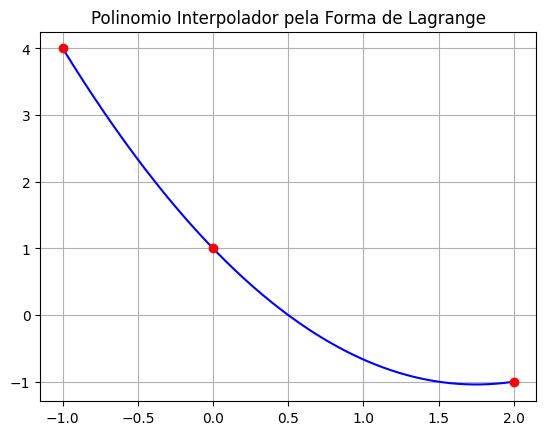

In [75]:
# Exemplo

# Dados do problema.
x = [-1, 0, 2]
y = [4, 1, -1]

# Interpolação de Lagrange.
p=interpLagrangeGrafico(x,y)



#### 2 - Forma de newton

In [76]:

def interpNewton(x, y, xi):
  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]
    
  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
    
  # Imprimindo diferenças divididas.
  # fdd_table = pd.DataFrame(fdd)
  #print(fdd_table)
    
  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, n):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm
    
  #Retornando g(xi).
  return yint

def interpNewtonGrafico(x,y,ShowGraph=True):
  """Função que Encontra o polinômio interpolador pela forma de newton.\n
  Parâmetros:\n
  x = vetor com valores x pra formação do polinômio Interpolador\n
  y = vetor com os valores de y pra formação da cunção interpoladora\n
  ShowGraph - Valor booleano pra gerar o gráfico da função interpoladora\n

  A função gera o gráfico da função interpoladora e retorna os valores da função interpoladora nesse intervalo passado por parâmetro.
  """
  Intervalo=np.arange(min(x),max(x)+0.0001,0.01)
  n = len(x)
  fdd = [[None for x in range(n)] for x in range(n)]

  for i in range(n):
    fdd[i][0] = y[i] 

  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  #fdd_table = pd.DataFrame(fdd)
  #print(fdd_table)
  yt = []

  for xi in Intervalo:
    xterm = 1
    yint  = fdd[0][0]
    for order in range(1,n):
      xterm = xterm*(xi - x[order-1])
      yint  = yint + fdd[0][order]*xterm
    yt.append(yint)
    
  if ShowGraph:
    plt.title(f'Polinomio Interpolador pela Forma de Newton')
    plt.plot(Intervalo,yt,'b-')
    plt.plot(x,y,'ro')
    plt.grid()
    plt.show()

  return yt

In [77]:
def Results(f,pontosx,pontosy):
    x=np.arange(min(pontosx),max(pontosx)+0.0001,0.01)
    y= f(x)
    yt = []
    for i in x:
        yt.append(interpNewton(pontosx, pontosy, i))

    plt.plot(x,yt,marker = '', label= 'Função Interpoladora',color = 'green')
    plt.plot(pontosx,pontosy,'ro')
    plt.plot(x, y,'b--', label= 'Função f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gráfico da função f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

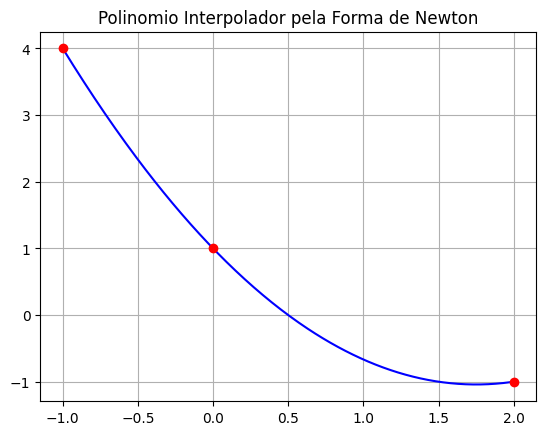

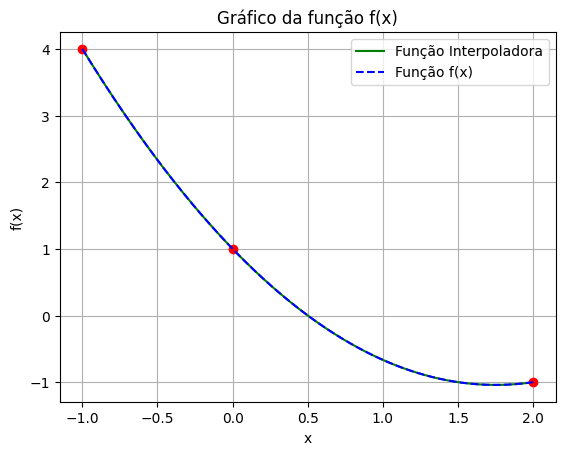

In [78]:
# exemplo
x  = [-1, 0, 2]
y  = [4, 1, -1]

f = lambda x: 1 - 7/3*x + 2/3*x**2
p = interpNewtonGrafico(x,y) 
Results(f,x,y)

### Escolha 2 funções polinomiais de graus entre 10 e 20 e obtenha o polinômio interpolador dessas 2 funções para 5, 8 e 10 pontos na tabela


#### Função 1 - grau 15

In [7]:
polynomial_15 = lambda x: (x**15 - np.cos(x))/ (1 + 25 * x ** 2)

#### Função 2 - grau 18

In [8]:
polynomial_18 = lambda x: (x**18 + 2*x**15 + np.cos(x))/ (1 + 25 * x ** 2)

#### Para 5 Pontos na tabela

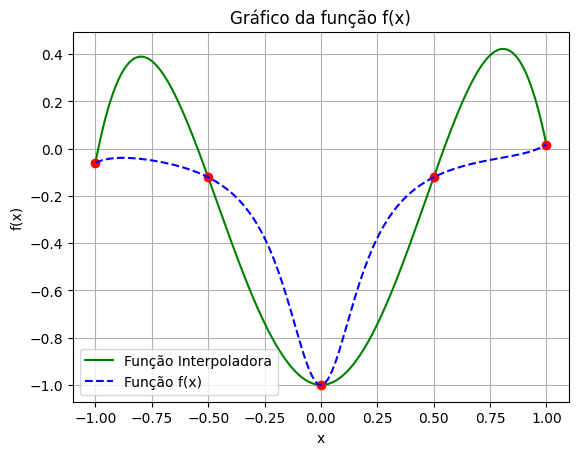

In [51]:
x = np.arange(-1, 1.1, 0.5)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

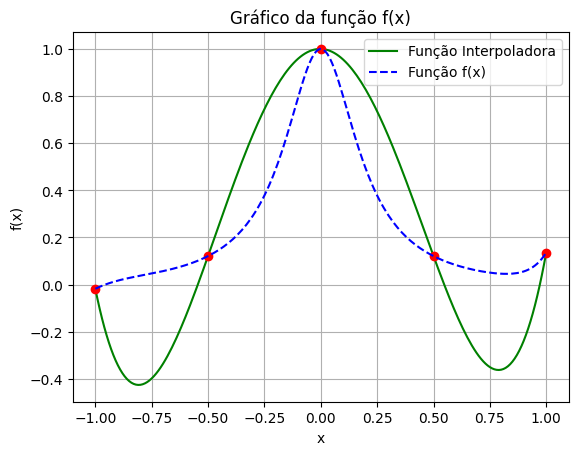

In [52]:
x = np.arange(-1, 1.1, 0.5)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

#### Para 8 pontos 

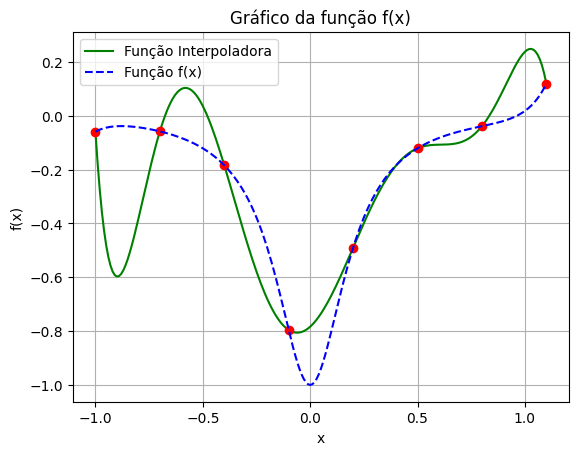

In [53]:
x = np.arange(-1, 1.15, 0.3)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

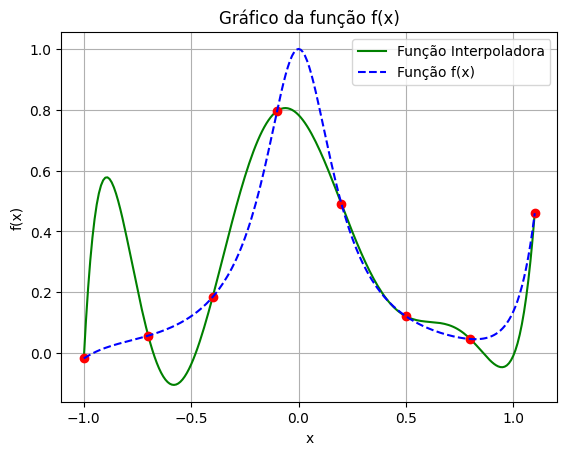

In [54]:
x = np.arange(-1, 1.15, 0.3)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

#### Pra 10 pontos

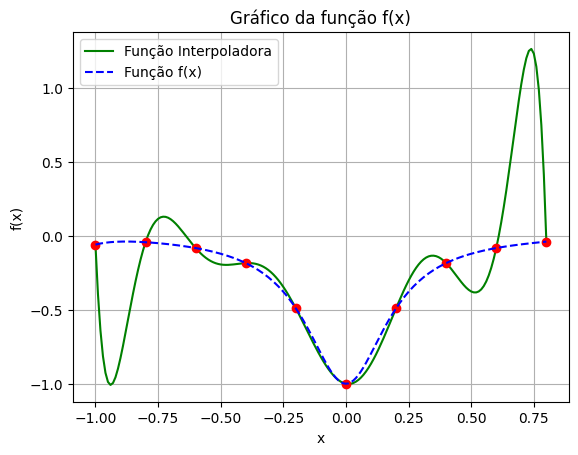

In [56]:
x = np.arange(-1, 1.0, 0.2)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

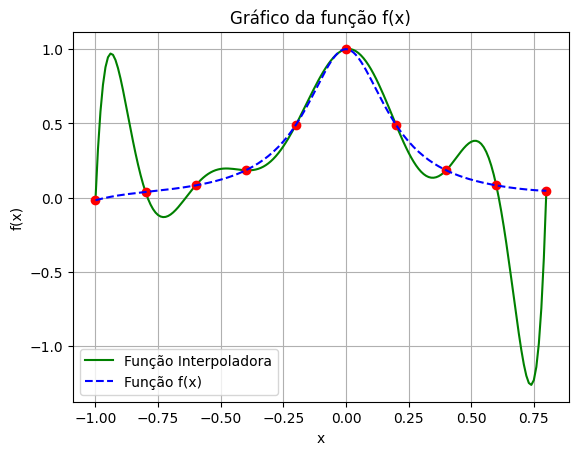

In [57]:
x = np.arange(-1, 1.0, 0.2)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

### Para 10 pontos igualmente espaçados use a função Spline quadrática e compare com a interpolação de 10 pontos acima.

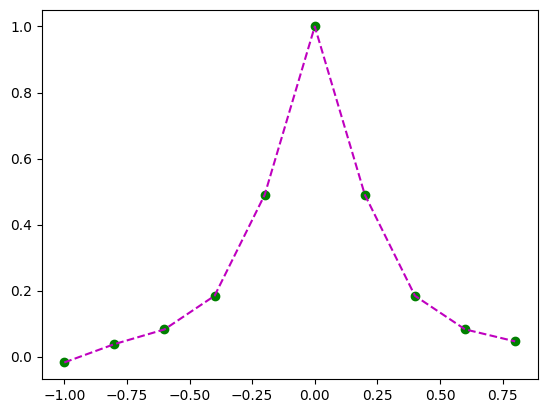

In [15]:
from scipy.interpolate import interp1d
x = np.arange(-1, 1.0, 0.2)
y= list(map(polynomial_18, x))
f2 = interp1d(x, y, kind='quadratic')
plt.plot(x, y, 'go', x, f2(x),'m--')
plt.show()

In [68]:
def Results(f,pontosx,pontosy,spline=True):
    x=np.arange(min(pontosx),max(pontosx)+0.0001,0.01)
    y= f(x)
    t  = x
    yt = []

    for i in t:
        yt.append(interpNewton(pontosx, pontosy, i))


    f2 = interp1d(x, y, kind='quadratic')

    plt.plot(t,yt,marker = '', label= 'Função Interpoladora',color = 'green')
    plt.plot(pontosx,pontosy,'ro')
    plt.plot(x, y,'b-.', label= 'Função f(x)')
    plt.plot(x, f2(x),'m--',label = 'spline quadrática')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gráfico da função f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

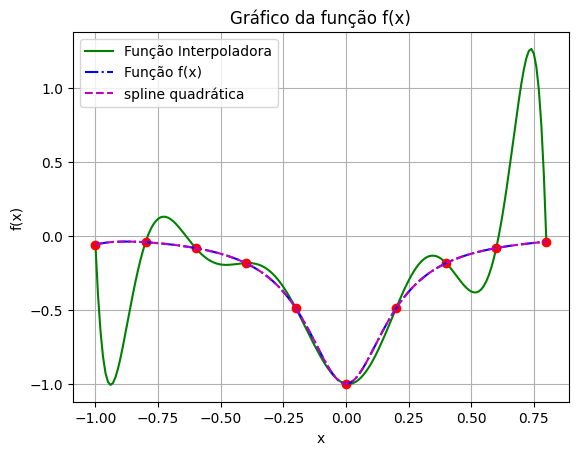

In [69]:
x = np.arange(-1, 0.9, 0.2)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01]


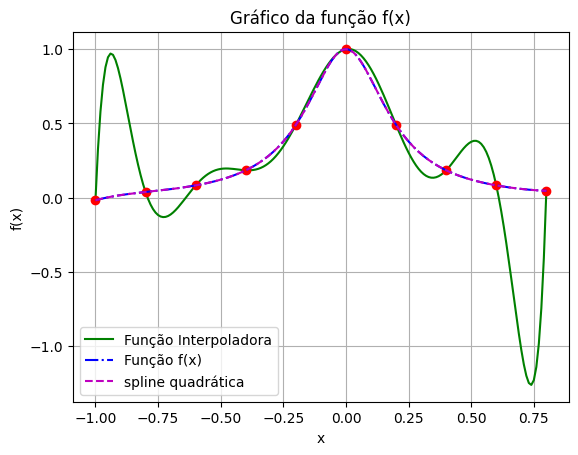

In [70]:
x = np.arange(-1, 0.9, 0.2)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

#### Escolha 20 pontos aleatórios dentro do intervalo tabelado, mas diferente dos valores na tabela, e compare o valor da  interpolação com o valor da função original.

In [71]:
import random

def gerar_pontos_aleatorios(n):
    pontos = []
    for _ in range(n):
        ponto = random.uniform(-1, 1)
        pontos.append(ponto)
    return pontos

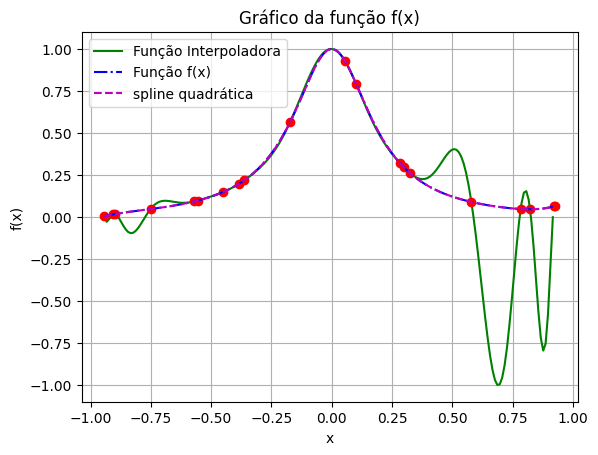

In [73]:
x = gerar_pontos_aleatorios(20)
pontosy= list(map(polynomial_18, x))
Intervalo = np.arange(-1, 1, 0.01)
Results(polynomial_18,x,pontosy)